In [35]:
# run code, and import env
import env
import pandas as pd
import numpy as np

In [36]:
user=env.user
host=env.host
password=env.password
url=f'mysql+pymysql://{user}:{password}@{host}/employees'
def get_db_url(n):
    n=url
    return url

In [4]:
# extra information from employees table
pd.read_sql('SELECT * FROM employees',url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [18]:
# intentionally make error in url
url = f'get_db_url://{uer}:{password}@{host}/employees'
# nameError

NameError: name 'uer' is not defined

In [19]:
# intentionally make error in SQL query
pd.read_sql('SELECT * FROM employees',url)
# nosuchmoduleerror

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [20]:
pd.read_sql('SELECT * FROM employees',url)
pd.read_sql('SELECT * FROM titles',url)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [21]:
pd.read_sql('SELECT * FROM employees',url).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [22]:
pd.read_sql('SELECT * FROM titles',url).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [23]:
pd.read_sql('SELECT * FROM titles',url).sort_values('to_date')

,emp_no,title,from_date,to_date
16064,20869,Engineer,1985-02-17,1985-03-01
406358,474918,Engineer,1985-02-10,1985-03-11
346216,434232,Staff,1985-02-26,1985-03-20
35527,34059,Senior Engineer,1985-02-10,1985-03-23
277603,287732,Staff,1985-04-14,1985-04-17
...,...,...,...,...
191714,229523,Senior Engineer,1996-11-29,9999-01-01
191712,229522,Senior Engineer,2002-01-22,9999-01-01
191707,229520,Staff,1999-09-07,9999-01-01
191723,229529,Senior Engineer,1997-04-05,9999-01-01


In [24]:
pd.read_sql('SELECT * FROM titles WHERE to_date<now()',url).sort_values('to_date',ascending=False)

,emp_no,title,from_date,to_date
70899,204324,Technique Leader,1985-02-10,2002-08-01
54796,90666,Engineer,1997-08-01,2002-08-01
177487,461960,Staff,1997-08-01,2002-08-01
146450,416185,Staff,1999-10-28,2002-08-01
31077,55876,Staff,1995-08-01,2002-08-01
...,...,...,...,...
127199,287732,Staff,1985-04-14,1985-04-17
16209,34059,Senior Engineer,1985-02-10,1985-03-23
158686,434232,Staff,1985-02-26,1985-03-20
186225,474918,Engineer,1985-02-10,1985-03-11


In [25]:
# exercises 2

In [26]:
# Create the users DataFrame.

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users
# Create the roles DataFrame

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

pd.concat([users,roles],axis=0, join='left')

ValueError: Only can inner (intersect) or outer (union) join the other axis

In [ ]:

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users
# Create the roles DataFrame

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

pd.concat([users,roles],axis=0, join='outer')

In [ ]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike']
})
users
# Create the roles DataFrame

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

users.merge(roles, left_on='role_id', right_on='id', how='outer', indicator=True)


In [ ]:
# Load the dataset and store it in the variable mpg.

from pydataset import data
mpg = data('mpg')
mpg.head()

In [ ]:
mpg.shape

In [ ]:
mpg.describe()

In [ ]:
len(mpg.groupby('manufacturer'))

In [ ]:
len(mpg.groupby('model'))

In [ ]:
mpg['mileage_difference']=mpg.hwy-mpg.cty

In [ ]:
mpg

In [ ]:
mpg['average_mileage']=round(mpg.hwy-mpg.cty.mean(),2)

In [ ]:
mpg

In [ ]:
mpg['is_automatic']=np.where(mpg.trans.str.contains('auto'), 'Y', 'N')

In [ ]:
mpg

In [ ]:
mpg['combined_mpg']=(mpg.cty+mpg.hwy)/2

In [ ]:
mpg[['manufacturer','model','year','combined_mpg']].sort_values(by='combined_mpg',ascending=False)

In [ ]:
mpg.groupby('is_automatic').combined_mpg.max()

In [ ]:
# exercises3

In [6]:
user=env.user
host=env.host
password=env.password
url=f'mysql+pymysql://{user}:{password}@{host}/chipotle'
def get_db_url(n):
    n=url
    return url
orders=pd.read_sql('SELECT * FROM orders',url)

In [7]:
orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [8]:
orders['total_prices']=(orders.item_price.str.replace('[$,]','').astype(float))*orders.quantity
orders
top=orders.groupby('item_name').total_prices.sum().nlargest(3)
top3=pd.DataFrame(data=top, columns=['item_name', 'total_prices'])
top3.item_name=top3.index
top3

/var/folders/3k/kd9rcxws7ygft2krzxncw_400000gn/T/ipykernel_3893/1968596311.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  orders['total_prices']=(orders.item_price.str.replace('[$,]','').astype(float))*orders.quantity


,item_name,total_prices
item_name,,
Chicken Bowl,Chicken Bowl,8044.63
Chicken Burrito,Chicken Burrito,6387.06
Steak Burrito,Steak Burrito,4236.13


<AxesSubplot:xlabel='item_name'>

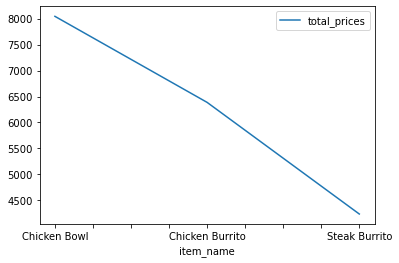

In [11]:
top3.plot()

In [12]:
# exercise III question 5

In [89]:
url=f'mysql+pymysql://{user}:{password}@{host}/employees'
def get_db_url(n):
    n=url
    return url
employees=pd.read_sql('SELECT * FROM employees JOIN titles USING (emp_no)',url)

In [90]:
employees[['title','hire_date']].groupby('title').max()

,hire_date
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-28
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-31


In [92]:
url=f'mysql+pymysql://{user}:{password}@{host}/employees'
def get_db_url(n):
    n=url
    return url
dept_em=pd.read_sql('SELECT * FROM employees JOIN titles USING (emp_no) JOIN dept_emp USING (emp_no) JOIN departments USING (dept_no)',url)

In [94]:
dept_em[['title','dept_name']].groupby('dept_name').value_counts()

dept_name           title             
Customer Service    Staff                 16150
                    Senior Staff          13925
                    Engineer               2362
                    Senior Engineer        2027
                    Technique Leader        309
                    Assistant Engineer      298
                    Manager                   4
Development         Engineer              58135
                    Senior Engineer       49326
                    Assistant Engineer     7769
                    Technique Leader       7683
                    Staff                  1424
                    Senior Staff           1247
                    Manager                   2
Finance             Staff                 13929
                    Senior Staff          12139
                    Manager                   2
Human Resources     Staff                 14342
                    Senior Staff          12274
                    Manager                   2
M